In [11]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, MultiPoint
from shapely.ops import substring

In [ ]:
# Create a line
line = LineString([(0,0), (1,1), (2,2), (3,3)])

distance = 0.5 # Interpolation distance
num_points = 10 # Number of points

In [ ]:
# Method 1, interpolate one point every n units using interpolate
interp_points_1 = [line.interpolate(d) for d in np.arange(0, line.length, distance)]

# Add the end point
interp_points_1.append(Point(line.coords[-1]))

In [ ]:
# Method 2, interpolate one point every n units using substring
interp_points_2 = [Point(substring(line, d, d+distance).coords[:][0]) for d in np.arange(0, line.length, distance)]

# Add the end point
interp_points_2.append(Point(line.coords[-1]))

In [ ]:
# Method 3, Fixed number of points
interp_points_3 = [line.interpolate(distance) for distance in np.linspace(0, line.length, num_points)]

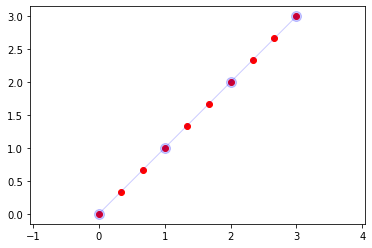

In [64]:
# Plot the result of the Method 3

interp_points = np.array([(pt.x, pt.y) for pt in interp_points_3])
line_points = np.array([(pt[0], pt[1]) for pt in line.coords[:]])

# Creates a figure and one subplot
fig, ax = plt.subplots()

# Plot the line
ax.plot(line_points[:,0], line_points[:,1], color='b', marker='o', alpha=0.2, linewidth=1, markersize=10)

# Plot the points
ax.scatter(line_points[:,0], line_points[:,1], c='r')

# Show the plot
ax.set_aspect('equal', adjustable='datalim')
plt.show()